In [1]:
import pandas as pd
titanic_df = pd.read_csv("titanic_data.csv")

sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard

In [2]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


从这里可以看出，乘客有891人。乘客的平均年龄是29.70岁，。

In [3]:
total_survied=titanic_df['Survived'].sum()
total_survied

342

In [4]:
total_num=len(titanic_df)
total_num

891

In [5]:
total_survived_rate =  titanic_df['Survived'].sum()/len(titanic_df)
total_survived_rate

0.38383838383838381

整艘船的生还比例是0.383.

In [46]:
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [55]:
graph_1 = pd.DataFrame({'female': [num_female], 'male': [num_male],},
                       index=['survived'])
print (graph_1)

          female  male
survived     314   577


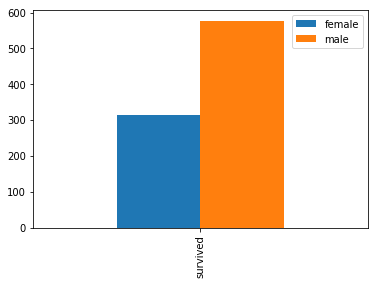

In [128]:
graph_1.plot(kind='bar')
plt.show()

In [6]:
grouped_sex = titanic_df.groupby('Sex')
grouped_sex.groups

{'female': Int64Index([  1,   2,   3,   8,   9,  10,  11,  14,  15,  18,
             ...
             866, 871, 874, 875, 879, 880, 882, 885, 887, 888],
            dtype='int64', length=314),
 'male': Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  17,  20,
             ...
             873, 876, 877, 878, 881, 883, 884, 886, 889, 890],
            dtype='int64', length=577)}

In [7]:
num_female = len(grouped_sex.groups['female'])
num_female

314

In [8]:
num_male = len(grouped_sex.groups['male'])
num_male

577

In [9]:
grouped_sex_survived = titanic_df.groupby(['Sex', 'Survived'])
grouped_sex_survived.groups

{('female',
  0): Int64Index([ 14,  18,  24,  38,  40,  41,  49,  71, 100, 111, 113, 114, 119,
             132, 140, 147, 167, 177, 180, 199, 205, 229, 235, 240, 246, 251,
             254, 264, 276, 293, 297, 312, 357, 362, 374, 396, 402, 404, 409,
             415, 419, 423, 436, 474, 485, 498, 501, 502, 503, 534, 541, 542,
             564, 567, 578, 593, 610, 617, 634, 638, 642, 654, 657, 678, 680,
             702, 729, 736, 767, 772, 792, 799, 807, 813, 816, 852, 854, 863,
             882, 885, 888],
            dtype='int64'),
 ('female', 1): Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  19,  22,
             ...
             858, 862, 865, 866, 871, 874, 875, 879, 880, 887],
            dtype='int64', length=233),
 ('male', 0): Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  20,  26,
             ...
             872, 873, 876, 877, 878, 881, 883, 884, 886, 890],
            dtype='int64', length=468),
 ('male', 1): Int64Index([ 17,  21,  23,  36,  55,  65,  74,  

In [10]:
num_female_dead = len(grouped_sex_survived.groups['female',
  0])
print(num_female_dead)
num_female_survived = len(grouped_sex_survived.groups['female',
  1])
print(num_female_survived)
total_female_survived_rate = num_female_survived/total_survied
female_survived_rate = num_female_survived/num_female
print(female_survived_rate)
print(total_female_survived_rate)

81
233
0.7420382165605095
0.681286549708


In [11]:
num_male_dead = len(grouped_sex_survived.groups['male',
  0])
print(num_male_dead)
num_male_survived = len(grouped_sex_survived.groups['male',
  1])
print(num_male_survived)
total_male_survived_rate = num_male_survived/total_survied
male_survived_rate = num_male_survived/num_male
print(male_survived_rate)
print(total_male_survived_rate)

468
109
0.18890814558058924
0.318713450292


In [72]:
graph_2 = pd.DataFrame({'survived': [num_female_survived, num_male_survived], 'dead': [num_female_dead, num_male_dead],},
                       index=['female','male'])
print (graph_2)

        dead  survived
female    81       233
male     468       109


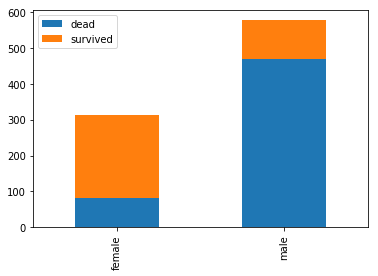

In [81]:
graph_2.plot(kind='bar',stacked=True)
plt.show()

生还的女性乘客有223名，占女性乘客的0.74，占生还总人数0.68.
生还的男性乘客有109名，占男性乘客的0.18，占生还总人数0.318.

In [12]:
grouped_pclass_survived = titanic_df.groupby(['Pclass', 'Survived'])
grouped_pclass_survived.groups

{(1,
  0): Int64Index([  6,  27,  30,  34,  35,  54,  62,  64,  83,  92,  96, 102, 110,
             118, 124, 137, 139, 155, 168, 170, 174, 177, 185, 245, 252, 262,
             263, 270, 273, 284, 295, 297, 331, 332, 336, 339, 351, 373, 377,
             434, 438, 452, 456, 462, 467, 475, 487, 492, 493, 498, 505, 515,
             527, 536, 544, 545, 555, 557, 583, 602, 625, 633, 659, 662, 671,
             694, 698, 711, 741, 745, 748, 766, 782, 789, 793, 806, 815, 822,
             867, 872],
            dtype='int64'),
 (1, 1): Int64Index([  1,   3,  11,  23,  31,  52,  55,  61,  88,  97,
             ...
             842, 849, 853, 856, 857, 862, 871, 879, 887, 889],
            dtype='int64', length=136),
 (2,
  0): Int64Index([ 20,  33,  41,  70,  72,  99, 117, 120, 122, 134, 135, 144, 145,
             148, 149, 150, 178, 181, 191, 199, 213, 217, 219, 221, 228, 232,
             234, 236, 238, 239, 242, 249, 265, 277, 292, 308, 312, 314, 317,
             342, 343, 344, 357, 3

In [13]:
num_class1_dead = len(grouped_pclass_survived.groups[1, 0])
num_class1_dead
num_class1_survived = len(grouped_pclass_survived.groups[1, 1])
total_class1_servived_rate = num_class1_survived/total_survied
class1_servived_rate = num_class1_survived/(num_class1_dead+num_class1_survived)
print(num_class1_dead)
print(num_class1_survived)
print(class1_servived_rate)
print(total_class1_servived_rate)

80
136
0.6296296296296297
0.397660818713


In [14]:
num_class2_dead = len(grouped_pclass_survived.groups[2, 0])
num_class2_survived = len(grouped_pclass_survived.groups[2, 1])
total_class2_servived_rate = num_class2_survived/total_survied
class2_servived_rate = num_class2_survived/(num_class2_dead+num_class2_survived)
print(num_class2_dead)
print(num_class2_survived)
print(class2_servived_rate)
print(total_class2_servived_rate)

97
87
0.47282608695652173
0.254385964912


In [15]:
num_class3_dead = len(grouped_pclass_survived.groups[3, 0])
num_class3_survived = len(grouped_pclass_survived.groups[3, 1])
total_class3_servived_rate = num_class3_survived/total_survied
class3_servived_rate = num_class3_survived/(num_class3_dead+num_class3_survived)
print(num_class3_dead)
print(num_class3_survived)
print(class3_servived_rate)
print(total_class3_servived_rate)

372
119
0.24236252545824846
0.347953216374


In [74]:
graph_3 = pd.DataFrame({'survived': [num_class1_survived, num_class2_survived, num_class3_survived], 'dead': [num_class1_dead, num_class2_dead, num_class3_dead],},
                       index=['class1','class2', 'class3'])
print (graph_3)

        dead  survived
class1    80       136
class2    97        87
class3   372       119


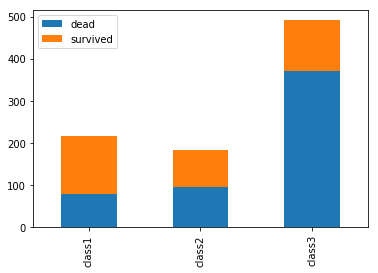

In [78]:
graph_3.plot(kind='bar', stacked=True)
plt.show()

In [84]:
grouped_embarked_survived = titanic_df.groupby(['Embarked', 'Survived'])
grouped_embarked_survived.groups

{('C',
  0): Int64Index([ 26,  30,  34,  42,  48,  54,  57,  60,  64,  73,  96, 111, 114,
             118, 122, 130, 135, 139, 140, 155, 174, 177, 181, 203, 240, 244,
             273, 285, 292, 295, 296, 308, 352, 354, 361, 362, 373, 377, 378,
             420, 452, 487, 493, 495, 505, 522, 524, 531, 532, 544, 557, 568,
             578, 583, 584, 598, 620, 659, 661, 685, 693, 698, 702, 731, 766,
             773, 789, 793, 798, 817, 832, 843, 847, 852, 859],
            dtype='int64'),
 ('C',
  1): Int64Index([  1,   9,  19,  31,  36,  39,  43,  52,  65,  97, 125, 128, 194,
             195, 207, 209, 215, 218, 255, 256, 258, 291, 299, 306, 307, 309,
             310, 311, 319, 325, 329, 337, 366, 367, 369, 370, 375, 380, 381,
             389, 393, 448, 453, 455, 469, 473, 484, 496, 513, 523, 533, 537,
             539, 547, 550, 553, 556, 581, 587, 591, 599, 604, 608, 622, 632,
             641, 644, 645, 647, 679, 681, 691, 700, 709, 710, 716, 737, 742,
             762, 780, 803

In [129]:
num_C_dead = len(grouped_embarked_survived.groups['C',0])
num_C_survived = len(grouped_embarked_survived.groups['C',1])
C_survived_rate = num_C_survived/(num_C_dead+num_C_survived)
print(C_survived_rate)
print(num_C_dead,num_C_survived)


0.5535714285714286
75 93


In [130]:
num_Q_dead = len(grouped_embarked_survived.groups['Q',0])
num_Q_survived = len(grouped_embarked_survived.groups['Q',1])
Q_survived_rate = num_Q_survived/(num_Q_dead+num_Q_survived)
print(Q_survived_rate)
print(num_Q_dead,num_Q_survived)

0.38961038961038963
47 30


In [131]:
num_S_dead = len(grouped_embarked_survived.groups['S',0])
num_S_survived = len(grouped_embarked_survived.groups['S',1])
Q_survived_rate = num_Q_survived/(num_Q_dead+num_Q_survived)
print(Q_survived_rate)
print(num_S_dead,num_S_survived)

0.38961038961038963
427 217


In [93]:
graph_4 = pd.DataFrame({'survived': [num_C_survived, num_Q_survived, num_S_survived], 'dead': [num_C_dead, num_Q_dead, num_S_dead],},
                       index=['embarkedC','embarkedQ', 'embarkedS'])
print (graph_4)

           dead  survived
embarkedC    75        93
embarkedQ    47        30
embarkedS   427       217


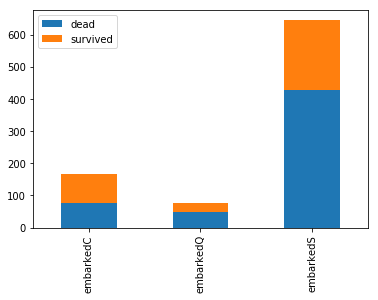

In [96]:
graph_4.plot(kind='bar', stacked=True)
plt.show()

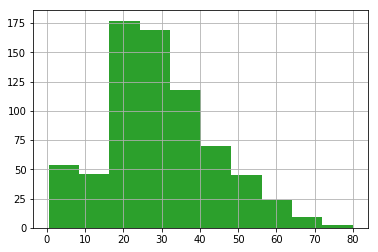

In [105]:
titanic_df['Age'].hist()
plt.show()

In [132]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [112]:
def get_age_group(age):
    if age < 18:
        return 'child'
    elif age < 50:
        return 'middle'
    else:
        return 'old'
titanic_df['Age_group'] = titanic_df['Age'].dropna().apply(get_age_group)
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,middle
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,middle
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,middle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,middle


In [114]:
grouped_age_survived = titanic_df.groupby(['Age_group', 'Survived'])
grouped_age_survived.groups


{('child',
  0): Int64Index([  7,  14,  16,  24,  50,  59,  63,  71,  86, 111, 114, 119, 138,
             147, 163, 164, 171, 182, 205, 266, 278, 282, 297, 333, 352, 374,
             386, 419, 433, 480, 500, 532, 541, 542, 574, 634, 642, 683, 686,
             721, 731, 746, 764, 787, 791, 813, 819, 824, 841, 844, 850, 852],
            dtype='int64'),
 ('child',
  1): Int64Index([  9,  10,  22,  39,  43,  58,  68,  78,  84, 125, 156, 165, 172,
             183, 184, 193, 208, 220, 233, 237, 261, 305, 307, 329, 340, 348,
             381, 389, 407, 435, 445, 446, 448, 469, 479, 489, 504, 530, 535,
             549, 550, 618, 644, 689, 691, 720, 750, 751, 755, 777, 780, 781,
             788, 802, 803, 827, 830, 831, 853, 869, 875],
            dtype='int64'),
 ('middle', 0): Int64Index([  0,   4,  12,  13,  18,  20,  27,  30,  34,  35,
             ...
             873, 876, 877, 881, 882, 883, 884, 885, 886, 890],
            dtype='int64', length=325),
 ('middle', 1): Int64Index([ 

In [133]:
num_child_dead = len(grouped_age_survived.groups['child',0])
num_child_survived = len(grouped_age_survived.groups['child',1])
child_survived_rate = num_child_survived/(num_child_dead+num_child_survived)
print(child_survived_rate)
print(num_child_dead)
print(num_child_survived)

0.5398230088495575
52
61


In [134]:
num_middle_dead = len(grouped_age_survived.groups['middle',0])
num_middle_survived = len(grouped_age_survived.groups['middle',1])
middle_survived_rate = num_middle_survived/(num_middle_dead+num_middle_survived)
print(middle_survived_rate)
print(num_middle_dead)
print(num_middle_survived)

0.38330170777988615
325
202


In [135]:
num_old_dead = len(grouped_age_survived.groups['old',0])
num_old_survived = len(grouped_age_survived.groups['old',1])
old_survived_rate = num_old_survived/(num_old_dead+num_old_survived)
print(old_survived_rate)
print(num_old_dead)
print(num_old_survived)

0.36486486486486486
47
27


In [121]:
graph_5 = pd.DataFrame({'survived': [num_child_survived, num_middle_survived, num_old_survived], 'dead': [num_child_dead, num_middle_dead, num_old_dead],},
                       index=['child','middle', 'old'])
print (graph_5)

        dead  survived
child     52        61
middle   325       202
old       47        27


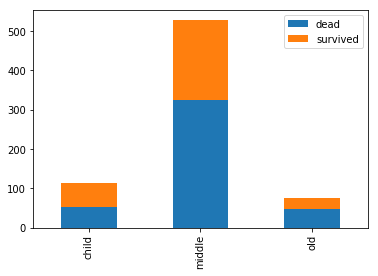

In [125]:
graph_5.plot(kind='bar', stacked=True)
plt.show()